In [2]:
# SeamFEMの入力ファイル（section作成）
import tkinter as tk
import tkinter.filedialog as fd
import numpy as np
from matplotlib import pyplot as plt



def input_dat():
    root = tk.Tk()
    root.withdraw()
    inf = fd.askopenfilename(
        filetypes=[("da_", ".dat")]
    )
    print("da_file: %s" %(inf))
    return inf

def input_vtx():
    root = tk.Tk()
    root.withdraw()
    inf = fd.askopenfilename(
        filetypes=[("xyz", ".xyz")]
    )
    print("vtx file: %s" %(inf))
    return inf


with open("C:/Users/kozo/Documents/PYTHON/Least_squares/jupyter_notebook/細長H型/exam_20_400_twodimension.xyz", "r") as f: 
    row = f.readlines()

data = np.zeros(((int(len(row)/12), 12, 2))) #各断面ごとの頂点座標を格納
for i in range(int(len(row)/12)):
    for j in range(12):
        rowdata = row[12*i + j].replace("\n", "")
        rowdata = rowdata.split(" ")
        data[i][j] = np.array([float(rowdata[0]), float(rowdata[1])])
    
print(data)

[[[1049.40833223 -612.55536393]
  [1049.40365464 -620.68570479]
  [1148.26409453 -612.61223814]
  [1148.25941694 -620.742579  ]
  [1048.76454331 -752.43394044]
  [1048.78928904 -760.56424499]
  [1147.61986408 -752.13306037]
  [1147.64460981 -760.26336492]
  [1096.19941132 -752.28956575]
  [1101.61771813 -752.27307437]
  [1096.73182973 -620.71293388]
  [1102.15005719 -620.71605112]]

 [[1052.91116924 -604.01792485]
  [1052.90624471 -612.32247191]
  [1151.05368217 -604.07612258]
  [1151.04875764 -612.38066965]
  [1052.89954547 -743.81852393]
  [1052.89711035 -752.12307211]
  [1151.04207143 -743.84730198]
  [1151.03963631 -752.15185015]
  [1099.19165025 -743.83209803]
  [1104.86814663 -743.83376254]
  [1099.48038504 -612.35009001]
  [1105.15687769 -612.35345613]]

 [[1054.82935777 -552.88387038]
  [1054.76089928 -560.9515326 ]
  [1153.10795077 -553.71781758]
  [1153.03949227 -561.78547979]
  [1054.97054496 -693.11994261]
  [1054.99897751 -701.18784517]
  [1153.25206583 -692.77358325]
  [1

[[[-49.76642186  73.94254235]
  [-49.77109945  65.81220149]
  [ 49.08934043  73.88566814]
  [ 49.08466284  65.75532728]
  [-50.41021078 -65.93603416]
  [-50.38546506 -74.06633871]
  [ 48.44510999 -65.63515409]
  [ 48.46985572 -73.76545864]
  [ -2.97534277 -65.79165947]
  [  2.44296404 -65.77516809]
  [ -2.44292437  65.7849724 ]
  [  2.9753031   65.78185516]]

 [[-49.26309566  74.07442683]
  [-49.26802019  65.76987976]
  [ 48.87941727  74.0162291 ]
  [ 48.87449274  65.71168203]
  [-49.27471944 -65.72617226]
  [-49.27715455 -74.03072043]
  [ 48.86780653 -65.75495031]
  [ 48.86537141 -74.05949848]
  [ -2.98261465 -65.73974636]
  [  2.69388173 -65.74141086]
  [ -2.69387986  65.74226167]
  [  2.98261279  65.73889555]]

 [[-49.70367555  74.28011508]
  [-49.77213404  66.21245287]
  [ 48.57491745  73.44616789]
  [ 48.50645896  65.37850567]
  [-49.56248835 -65.95595715]
  [-49.53405581 -74.02385971]
  [ 48.71903252 -65.60959779]
  [ 48.74746506 -73.67750035]
  [ -3.22694346 -65.79266348]
  [  1

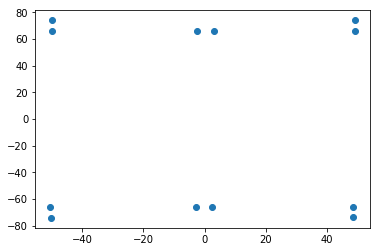

In [3]:
# 座標系を各重心点（0,0）に合わせる
for i in range(len(data)):
    mean = np.array([np.mean(data[i][8:].T[0]), np.mean(data[i][8:].T[1])])
    
    for j in range(12):
        data[i][j] -= mean

plt.scatter(data[0].T[0], data[0].T[1])
print(data)

In [23]:
# 各面を構成する長方形の厚さとその端中心座標を求める

uflange = np.zeros((len(data), 6)) #カラム補足　ー＞　0,1: 左板中心座標(x,y) 、2.3:右板中心座標(x.,y)、4:左板厚、5:右板厚
dflange = np.zeros((len(data), 6))
web = np.zeros((len(data), 6))

for i in range(len(data)):
    ufl_mean = np.array([np.mean(data[i][0:2].T[0]), np.mean(data[i][0:2].T[1])])
    ufr_mean = np.array([np.mean(data[i][2:4].T[0]), np.mean(data[i][2:4].T[1])])
    dfl_mean = np.array([np.mean(data[i][4:6].T[0]), np.mean(data[i][4:6].T[1])])
    dfr_mean = np.array([np.mean(data[i][6:8].T[0]), np.mean(data[i][6:8].T[1])])
    lw_mean = np.array([np.mean(data[i][[8,10]].T[0]), np.mean(data[i][[8,10]].T[1])])
    rw_mean = np.array([np.mean(data[i][[9,11]].T[0]), np.mean(data[i][[9,11]].T[1])])
    ufl_lig = np.linalg.norm(data[i][0] - data[i][1])
    ufr_lig = np.linalg.norm(data[i][2] - data[i][3])
    dfl_lig = np.linalg.norm(data[i][4] - data[i][5])
    dfr_lig = np.linalg.norm(data[i][6] - data[i][7])
    lw_lig = np.linalg.norm(data[i][8] - data[i][10])
    rw_lig = np.linalg.norm(data[i][9] - data[i][11])
    
    uflange[i] = np.array([ufl_mean[0], ufl_mean[1], ufr_mean[0], ufr_mean[1], ufl_lig, ufr_lig])
    dflange[i] = np.array([dfl_mean[0], dfl_mean[1], dfr_mean[0], dfr_mean[1], dfl_lig, dfr_lig])
    web[i] = np.array([lw_mean[0], lw_mean[1], rw_mean[0], rw_mean[1], lw_lig, rw_lig])



# 平均をとる
uf_mean = np.array([np.mean(uflange.T[0]), np.mean(uflange.T[1]), np.mean(uflange.T[2]), np.mean(uflange.T[3]), np.mean(uflange.T[4]), np.mean(uflange.T[5])])
df_mean = np.array([np.mean(dflange.T[0]), np.mean(dflange.T[1]), np.mean(dflange.T[2]), np.mean(dflange.T[3]), np.mean(dflange.T[4]), np.mean(dflange.T[5])])
w_mean = np.array([np.mean(web.T[0]), np.mean(web.T[1]), np.mean(web.T[2]), np.mean(web.T[3]), np.mean(web.T[4]), np.mean(web.T[5])])

# 中央値をとる
uf_median = np.array([np.median(uflange.T[0]), np.median(uflange.T[1]), np.median(uflange.T[2]), np.median(uflange.T[3]), np.median(uflange.T[4]), np.median(uflange.T[5])])
df_median = np.array([np.median(dflange.T[0]), np.median(dflange.T[1]), np.median(dflange.T[2]), np.median(dflange.T[3]), np.median(dflange.T[4]), np.median(dflange.T[5])])
w_median = np.array([np.median(web.T[0]), np.median(web.T[1]), np.median(web.T[2]), np.median(web.T[3]), np.median(web.T[4]), np.median(web.T[5])])

# print(uf_median)
# print(df_median)
# print(w_median)
print(uf_mean)
print(df_mean)
print(w_mean)

[-49.38563541  69.78245257  48.68469866  69.43506395   7.60441256
   7.60441256]
[-50.01025417 -69.65885152  48.06039202 -69.55711253   7.60441256
   7.60441256]
[-2.64651143e+00  3.15317073e-03  2.64651143e+00 -3.15317073e-03
  1.31623579e+02  1.31599529e+02]


In [22]:
# 分割した際に正方形状になるために縦横比から分割数を決定する。
argm_data = np.array([uf_mean, df_mean, w_mean])

N = 50 #最大幅の分割数の指定
nn = np.zeros((3, 2)) #分割数を格納するための配列(0: 厚さ、1:幅)
for i in range(3):
    var = np.mean(argm_data[i][-2:])
    hor = np.linalg.norm(argm_data[i][0:2] - argm_data[i][2:4])
    if var < hor:
        rat = var / hor
        nn[i] = np.array([int(N*rat), N])
    else:
        rat = hor / var
        nn[i] = np.array([N, int(N*rat)])
        
print(nn)
    

[[ 3. 50.]
 [ 3. 50.]
 [50.  2.]]


In [49]:
# 編集datファイルのインプット
with open("./bou6.da_", "r") as f:
    row_dat = f.read()
    
row_dat = row_dat.split("/support")
row_dat[1] = row_dat[1].split("/mass")[1]

# 書き込み
with open("ex_.da_", "w") as f:
    f.write(row_dat[0])
    f.write("/support\n")
    print("{:>10d}{:>10d}{:>10d}{:>10d}{:>15}{:>10}{:>10d}{:>10d}{:>10d}{:>10d}{:>10d}{:>10d}{:>10d}{:>10d}{:>10d}".format(1, 1, 3, 0, "", "", 0, 0, 1, 0, 0, 0, 0, 0, 0), file = f)
   
    for i in range(3):
        print("{:>10d}{:>10d}{:>10f}{:>10f}{:>10f}{:>10f}{:>10f}{:>10f}{:>10d}{:>10d}" .format(int(nn[i][0]), int(nn[i][1]), argm_data[i][0], argm_data[i][1], argm_data[i][2], argm_data[i][3], argm_data[i][4], argm_data[i][5], 0, 0) ,file = f)
    
    f.write("/mass\n")
    f.write(row_dat[1])